<a href="https://colab.research.google.com/github/Utree/deeplearning2_colab_log/blob/master/1%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

x = np.array([1, 2, 3])
x.__class__ # クラス名を表示

numpy.ndarray

shapeメソッドで形状を表示

In [0]:
x.shape

(3,)

ndimメソッドで次元数を表示

In [0]:
x.ndim

1

In [0]:
W = np.array([[1, 2, 3], [4, 5, 6]])
W.shape

(2, 3)

In [0]:
W.ndim

2

行列の要素ごとの演算

In [0]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [0]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

ブロードキャスト

In [0]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

In [0]:
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

ベクトルの内積 : ２つのベクトルがどれだけ同じ方向を向いているか?
２つのベクトルが全く同じ方向を向いていれば、内積は1
逆向きであれば、内積は-1

![ベクトルの内積](https://rikeinvest.com/wp-content/uploads/2018/10/PNG%E3%82%A4%E3%83%A1%E3%83%BC%E3%82%B8-8.png)

行列の積

![ベクトルの内積](http://www.zeroprog.com/wp-content/uploads/2017/06/%E8%A1%8C%E5%88%97%E3%81%AE%E7%A9%8D%E3%81%AE%E8%A8%88%E7%AE%97%E6%96%B9%E6%B3%95-1024x723.jpg)

In [0]:
# ベクトルの内積
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a, b)

32

In [0]:
# 行列の積
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

行列やベクトル計算では、形状チェックが重要

ミニバッチ版の全結合層による変換

np.random.randn(行列の形状)で平均0、標準偏差1の正規分布に従った変数が生成される

In [0]:
W1 = np.random.randn(2, 4) # 重み
b1 = np.random.randn(4) # バイアス
x = np.random.randn(10, 2) # 入力
h = np.dot(x, W1) + b1

シグモイド関数

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x)) # np.exp(-x)でeの-x乗を表す

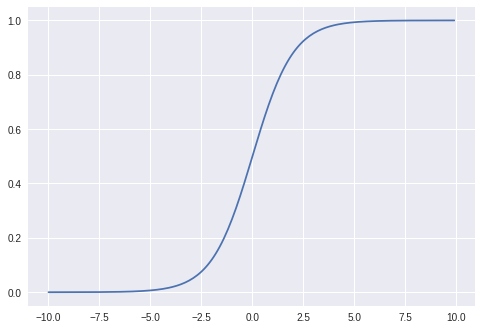

In [0]:
# np.arange(初項, 終点, ステップ数)で等差数列を生成する
x = np.arange(-10, 10, 0.1)

# 計算
y = sigmoid(x)

# プロットして、表示
plt.plot(x, y)
plt.show()

In [0]:
a = sigmoid(h)

In [0]:
x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

### 全結合層による変換をAffineレイヤ
### シグモイド関数による変換をSigmidレイヤとして定義

各レイヤはクラスとして定義

各クラスはforwardメソッドとbackwardメソッドを持つ

各クラスはparamsとgradsを持つ

In [0]:
# シグモイドレイヤ
class Sigmoid:
  def __init__(self):
    self.params = []
    
  # 順伝播のメソッドでシグモイド関数を実装
  def forward(self, x):
    return 1 / (1 + np.exp(-x))

In [0]:
# Affineレイヤ
class Affine:
  def __init__(self, W, b):
    self.params = [W, b]
    
  # 順伝播のメソッドで行列の積を計算する
  def forward(self, x):
    W, b = self.params
    
    return np.dot(x, W) + b

In [0]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size
    
    # 重みとバイアスの初期値
    W1 = np.random.randn(I, H)
    b1 = np.random.randn(H)
    W2 = np.random.randn(H, O)
    b2 = np.random.randn(O)
    
    # レイヤの生成
    self.layers = [
        Affine(W1, b1),
        Sigmoid(),
        Affine(W2, b2)
    ]
    
    # すべての重みをリストにまとめる
    self.params = []
    for layer in self.layers:
      self.params += layer.params
      
  def predict(self, x):
    # 各レイヤーを順に通していく
    for layer in self.layers:
      x = layer.forward(x)
      
    return x

In [0]:
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

In [0]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s)

[[ 0.48994321 -0.43124547 -0.72383753]
 [ 0.00863904 -0.5697909  -0.13844711]
 [ 1.10513154 -0.52455088 -0.93603948]
 [ 1.94023707 -0.64875967 -1.06192242]
 [ 1.83002603 -0.34307977 -1.60124779]
 [ 1.91540155 -0.40007866 -1.54062424]
 [ 0.58491352 -0.45299092 -0.750898  ]
 [ 0.90872376 -0.24824648 -1.2474322 ]
 [ 0.2938054  -0.68094571 -0.20109719]
 [ 1.75312284 -0.41759194 -1.41306478]]


学習がどれだけうまくいっているかを知るための「指標」: 損失(loss)

ニューラルネットワークの損失を求めるには損失関数(loss function)を使用する

ニューラルネットワークでは、損失関数として交差エントロピー(Cross Entropy Error)を用いる

活性化関数

1つのニューロンへの入力は、それぞれの入力(X1 , X2 , X3)に重み(W1 , W2 , W3)をかけ合わせた値にバイアス(b)を足した値となります。この合計値に対して、特定の関数を経由することで最終的な出力値を決定します。

その出力値を決定する関数が活性化関数となります。

![](https://newtechnologylifestyle.net/wp-content/uploads/2018/02/%E6%B4%BB%E6%80%A7%E5%8C%96%E9%96%A2%E6%95%B0.png)

c.f.)
https://newtechnologylifestyle.net/%E3%82%84%E3%81%A3%E3%81%B1%E3%82%8A%E3%82%88%E3%81%8F%E5%88%86%E3%81%8B%E3%82%89%E3%81%AA%E3%81%84%E6%B4%BB%E6%80%A7%E5%8C%96%E9%96%A2%E6%95%B0%E3%81%A8%E3%81%AF/

シグモイド関数は2クラスの識別問題の場合に非常によく使用されます

ソフトマックス関数:
多クラス問題の識別ではソフトマックス関数がよく使用されています

softmax関数の出力の各要素は0.0〜1.0以下実数になり、すべて足し合わせると1.0になるので、確率として解釈できる

In [0]:
# ソフトマックス関数
def softmax(a):
    # 一番大きい値を取得
    c = np.max(a)
    # 各要素から一番大きな値を引く（オーバーフロー対策）
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    # 要素の値/全体の要素の合計
    return exp_a / sum_exp_a

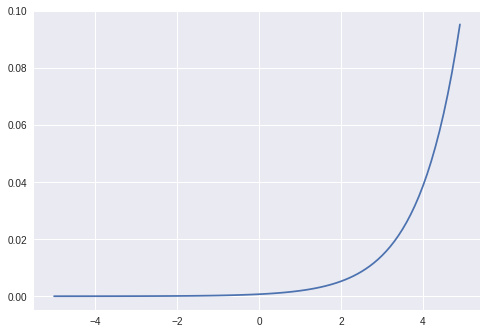

In [0]:
# np.arange(初項, 終点, ステップ数)で等差数列を生成する
x = np.arange(-5, 5, 0.1)

# 計算
y = softmax(x)

# プロットして、表示
plt.plot(x, y)
plt.show()

損失関数 : 交差エントロピー誤差

log(x)

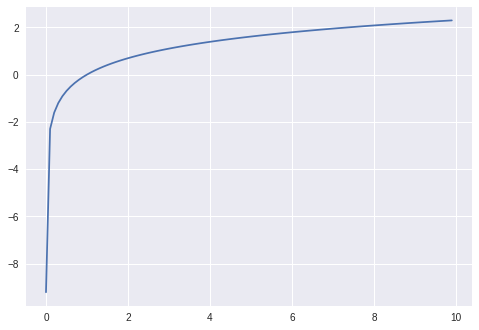

In [0]:
x = np.arange(0.0001, 10, 0.1)

y = np.log(x)
plt.plot(x, y)
plt.show()

In [0]:
# 交差エントロピー関数
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [0]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [0]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [0]:
# ソフトマックス関数
def softmax(a):
    # 一番大きい値を取得
    c = np.max(a)
    # 各要素から一番大きな値を引く（オーバーフロー対策）
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    # 要素の値/全体の要素の合計
    return exp_a / sum_exp_a

# # 交差エントロピー誤差関数
# def cross_entropy_error(y, t):
#   delta = 1e-7
#   return -np.sum(t * np.log(y + delta))
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
  if t.size == y.size:
    t = t.argmax(axis=1)
  
  batch_size = y.shape[0]
  
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# softmax with loss レイヤ
class SoftmaxWithLoss:
  def __init__(self):
    self.params, self.grads = [], []
    self.y = None # softmaxの出力
    self.t = None # 教師ラベル
    
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    
    # 教師ラベルがone-hotベクトルの場合、正解のインデックスに変換
    if self.t.size == self.y.size:
      self.t = self.t.argmax(axis=1)
  
    loss = cross_entropy_error(self.y, self.t)
    return loss
  
  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    
    dx = self.y.copy()
    dx[np.arange(batch_size), self.t] -= 1
    dx *= dout
    dx = dx / batch_size
    
    return dx

微分はある関数における変化の度合いを求めること

勾配 : ベクトルの各要素に関する微分をまとめたもの

数学用語の「勾配」では、ベクトルに対しての微分に限定される一方で、ディープラーニングの分野では、行列やテンソルについても微分を定義し、それを「勾配」と呼ぶ


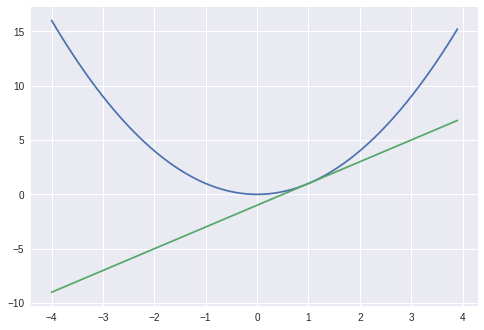

In [0]:
# np.arange(初項, 終点, ステップ数)で等差数列を生成する
x = np.arange(-4, 4, 0.1)

# 計算
y1 = x*x

y2 = 2*x-1

# プロットして、表示
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

合成関数とは、複数の関数によって、構成される関数

合成関数を微分する際は、チェインルール(連鎖律)を適応させる

誤差逆伝播法

計算グラフ : 計算の過程をグラフに表したもの

計算グラフの特徴 : 局所的な計算を伝播することによって最終的な結果を得ることができる

順伝播 : 計算グラフを左から右へ進めること

逆伝播: 計算グラフを右から左へ進めること

計算グラフのメリットは逆伝播をするときに多くの恩恵を受けることが出来る。


例えば、１つ100円のリンゴを2つ買い、消費税が１０%だった場合、

リンゴの価格が１円上がったときに、最終的な金額は何円増加するか?

のような計算を簡単に求めることができる

y = a * t * x

δy / δx = at

y = 2 * 100 * 1.1

δy / δx  = 2.2

In [0]:
import numpy as np

# Repeatノード
D, N = 8, 7
x = np.random.randn(1, D) # 入力
y = np.repeat(x, N, axis=0) # forward

dy = np.random.randn(N, D) # 仮の勾配
dx = np.sum(dy, axis=0, keepdims=True) # backward

In [0]:
import numpy as np

# Sumノード
D, N = 8, 7
x = np.random.randn(N, D) # 入力
y = np.sum(x, axis=0, keepdims =True) # forward

dy = np.random.randn(1, D) # 仮の勾配
dx = np.repeat(dy, N, axis=0) # backward

SumノードとRepeatノードはそれぞれ逆の関係にある。

In [0]:
dy

array([[-0.76855128,  1.19396349,  0.76376529, -0.12660023, -0.38413461,
         0.13840012, -0.53737315,  1.37850863]])

In [0]:
dx

array([[-0.76855128,  1.19396349,  0.76376529, -0.12660023, -0.38413461,
         0.13840012, -0.53737315,  1.37850863],
       [-0.76855128,  1.19396349,  0.76376529, -0.12660023, -0.38413461,
         0.13840012, -0.53737315,  1.37850863],
       [-0.76855128,  1.19396349,  0.76376529, -0.12660023, -0.38413461,
         0.13840012, -0.53737315,  1.37850863],
       [-0.76855128,  1.19396349,  0.76376529, -0.12660023, -0.38413461,
         0.13840012, -0.53737315,  1.37850863],
       [-0.76855128,  1.19396349,  0.76376529, -0.12660023, -0.38413461,
         0.13840012, -0.53737315,  1.37850863],
       [-0.76855128,  1.19396349,  0.76376529, -0.12660023, -0.38413461,
         0.13840012, -0.53737315,  1.37850863],
       [-0.76855128,  1.19396349,  0.76376529, -0.12660023, -0.38413461,
         0.13840012, -0.53737315,  1.37850863]])

MatMulノード : 行列の積(逆伝播の計算グラフでは転置行列をかける)

In [0]:
class MatMul:
  def __init__(self, W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]
    self.x = None
  
  def forward(self, x):
    W, = self.params
    out = np.dot(x, W)
    self.x = x
    return out
  
  def backward(self, dout):
    W, = self.params
    dx = np.dot(dout, W.T)
    dW = np.dot(self.x.T, dout)
    self.grads[0][...] = dW
    return dx

「３点リーダー」: [...]
grads[0][...] = dwとgrads[0] = dwはほとんど同じ意味

Numpy配列をコピーする際にメモリ空間上に複製するか、ポインタを移動させるかの違いがある。

In [0]:
# Sigmoidレイヤ
class Sigmoid:
  def __init__(self):
    self.params, self.grads = [], []
    self.out = None
  
  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out
    return out
  
  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx

In [0]:
# Affineレイヤ
class Affine:
  def __init__(self, W, b):
    self.params = [W, b]
    self.grads = [np.zeros_like(W), np.zeros_like(b)]
    self.x = None
    
  def forward(self, x):
    W, b = self.params
    out = np.dot(x, W) + b
    self.x = x
    return out
  
  def backward(self, dout):
    W, b = self.params
    dx = np.dot(dout, W.T)
    dW = np.dot(self.x.T, dout)
    db = np.sum(dout, axis=0)
    
    self.grads[0][...] = dW
    self.grads[1][...] = db
    return dx

In [0]:
# 交差エントロピー誤差関数
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

# Softmax with Lossレイヤ
class SigmoidWithLoss:
  def __init__(self):
    self.params, self.grads = [], []
    self.loss = None
    self.y = None # sigmoidの出力
    self.t = None # 教師データ
    
  def forward(self, x, t):
    self.t = t
    self.y = 1 / (1 + np.exp(-x))
    
    self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)
    
    return self.loss
  
  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    
    dx = (self.y - self.t) * dout / batch_size
    return dx

複数の関数を通す -> 誤差逆伝播法によって勾配を求める -> 勾配を使ってパラメータを更新する

訓練データの中からランダムに複数のデータを選び出す -> 誤差逆伝播法によって各損失関数に関する重みパラメータの勾配を求める -> 勾配を使って重みパラメータを更新する -> 繰り返す

勾配降下法：誤差逆伝播法によって得た勾配を用いて、パラメータを逆方向に更新すること

SGD(Stochastic Gradient Descent: 確率的勾配降下法)
確率的とは、ランダムに選ばれたデータ(ミニバッチ)に対する勾配を用いること

初 期 化 の 際 の 引 数 で あ る lr は learning rate（ 学 習 係 数 ）を 表
し ま す

(更新後の重みパラメータ) = (更新前の重みパラメータ) - (学習係数)*(損失関数の勾配)

In [0]:
import numpy as np
np.random.permutation(10)

array([3, 5, 0, 9, 7, 6, 1, 2, 4, 8])

In [0]:
np.random.permutation(10)

array([6, 9, 5, 4, 1, 0, 8, 7, 3, 2])

In [0]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

Numpyで32ビット浮動小数点数を使う

In [0]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [0]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

In [0]:
import cupy as cp
x = cp.arange(6).rashape(2, 3).astype('f')
x